In [1]:
import torch
import data_loader
import evaluation
import train 
import model

import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [5]:
datasets, tokens_vocab, y_vocab = data_loader.load(['train', 'dev'], S=50)
datasets['train']

Samples: 437 (no_sense: 0)
Sentences: 50 (N=76)
Vocab:
	Tokens:1009
	Senses:522

In [6]:
def experiment(conf_dict, num_epochs=10):
    
    m = model.WSDModel(
        tokens_vocab.size(), 
        y_vocab.size(), 
        D=conf_dict['D'], 
        dropout_prob=conf_dict['dropout_prob']
    ).to(device)

    optimizer = torch.optim.Adam(m.parameters(), lr=conf_dict['lr'], betas=(0.9, 0.999))

    losses, train_acc, val_acc = train.train(m, optimizer, datasets['train'], datasets['dev'],
                                             num_epochs=num_epochs, batch_size=conf_dict['batch_size'])
    return losses, train_acc, val_acc

In [7]:
lrs = [5e-3, 2e-3, 1e-3, 7e-4, 5e-4, 3e-4, 1e-4, 5e-5]
dropout = 0.2
D=300
batch_size=100
num_epochs=5

results = []
for lr in lrs:
    conf_dict = {
        'D':D, 
        'dropout_prob':dropout, 
        'lr':lr,
        'batch_size':batch_size
    }
    
    losses, train_acc, val_acc = experiment(conf_dict, num_epochs=num_epochs)
    results.append({
        'conf_dict': conf_dict,
        'stats': (losses, train_acc, val_acc)
    })

[4] loss: 58.365: 100%|██████████| 5/5 [00:00<00:00,  5.54it/s]


In [8]:
for i, r in enumerate(results):
    losses, train_acc, val_acc = r['stats']
    print(f"experiment {i}: val_acc={val_acc[-1]:.3f}")

experiment 0: val_acc=0.011
experiment 1: val_acc=0.007
experiment 2: val_acc=0.004
experiment 3: val_acc=0.011
experiment 4: val_acc=0.000
experiment 5: val_acc=0.000
experiment 6: val_acc=0.000
experiment 7: val_acc=0.000


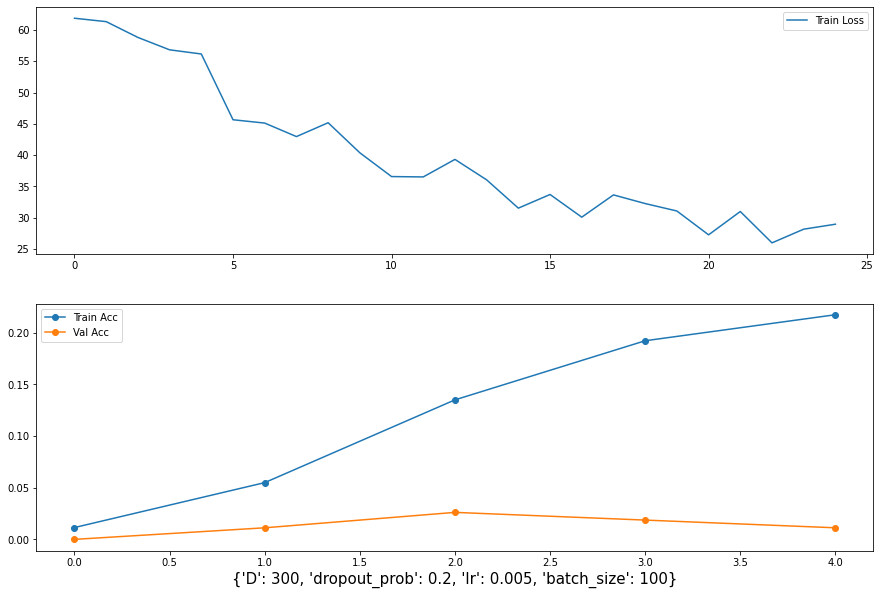

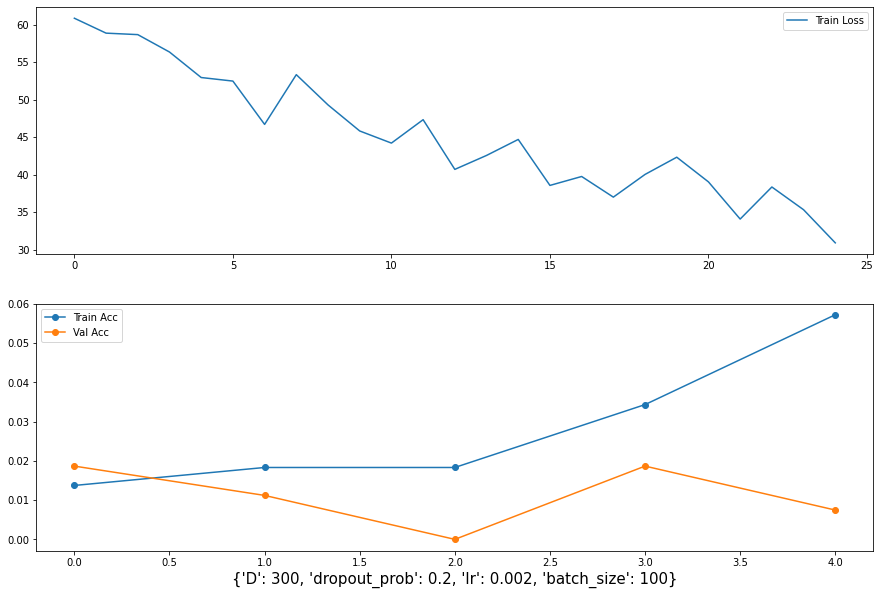

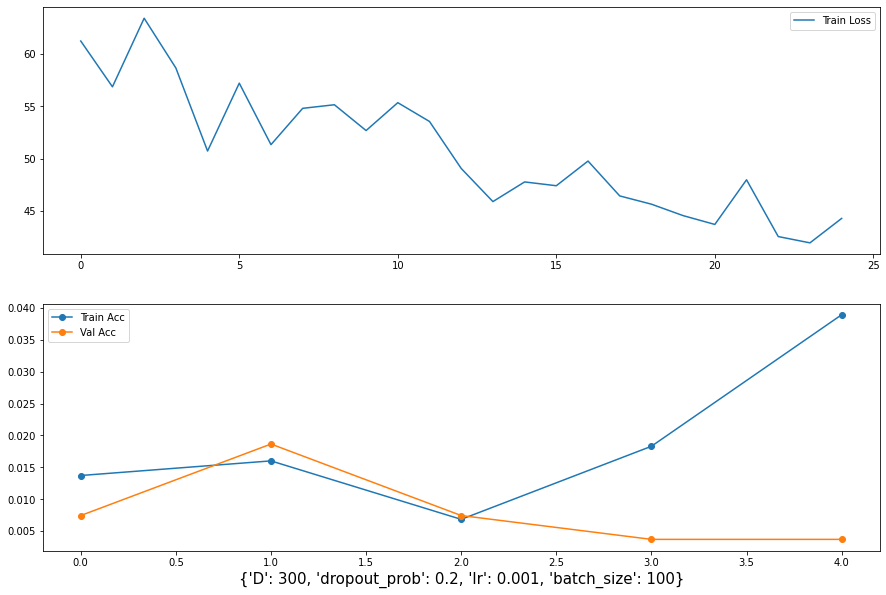

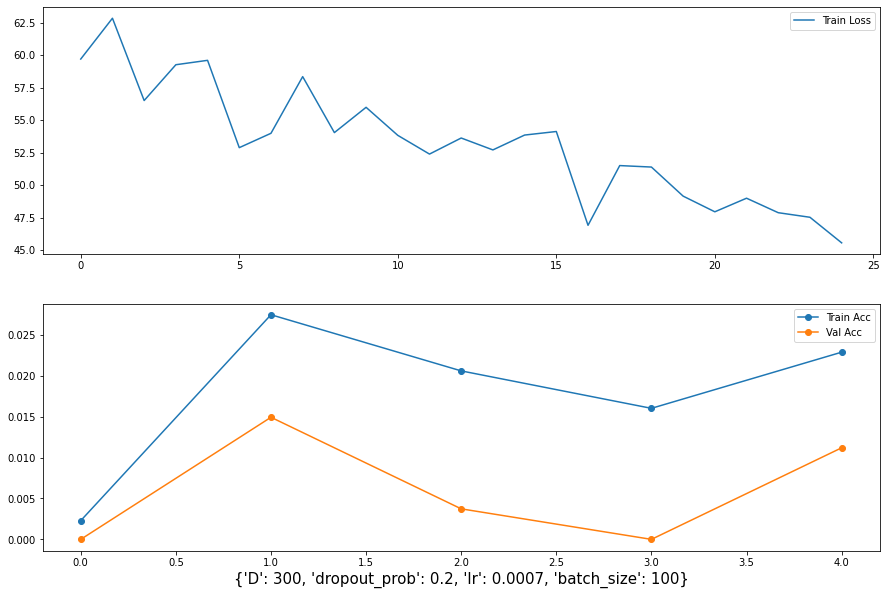

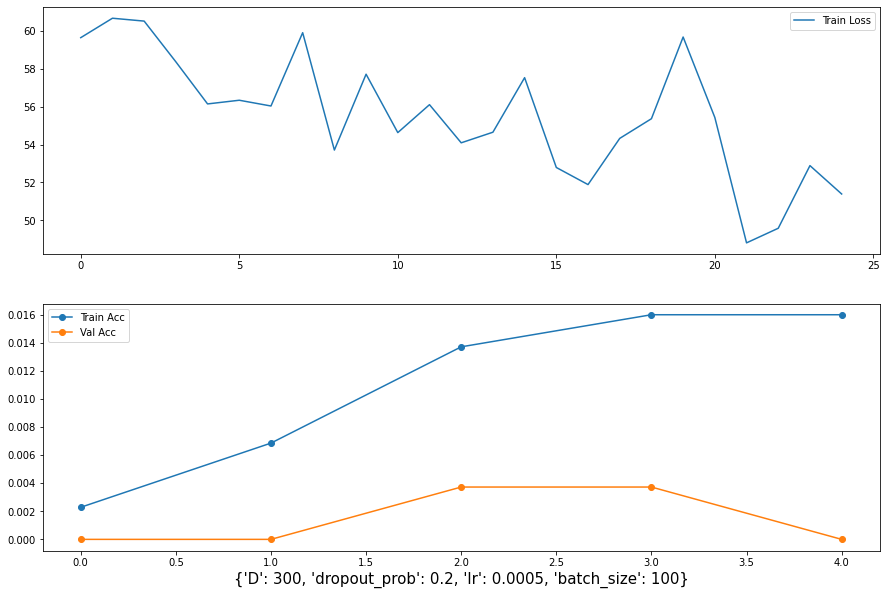

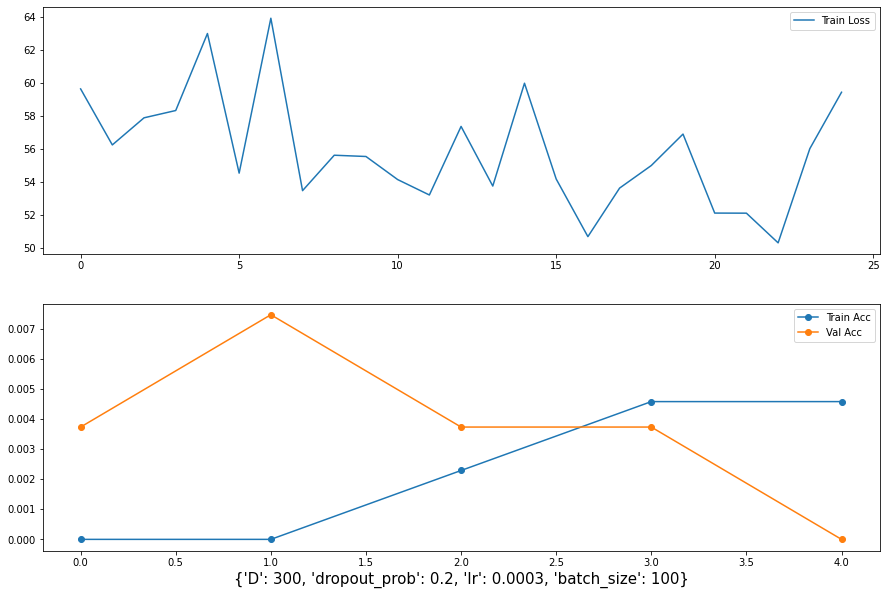

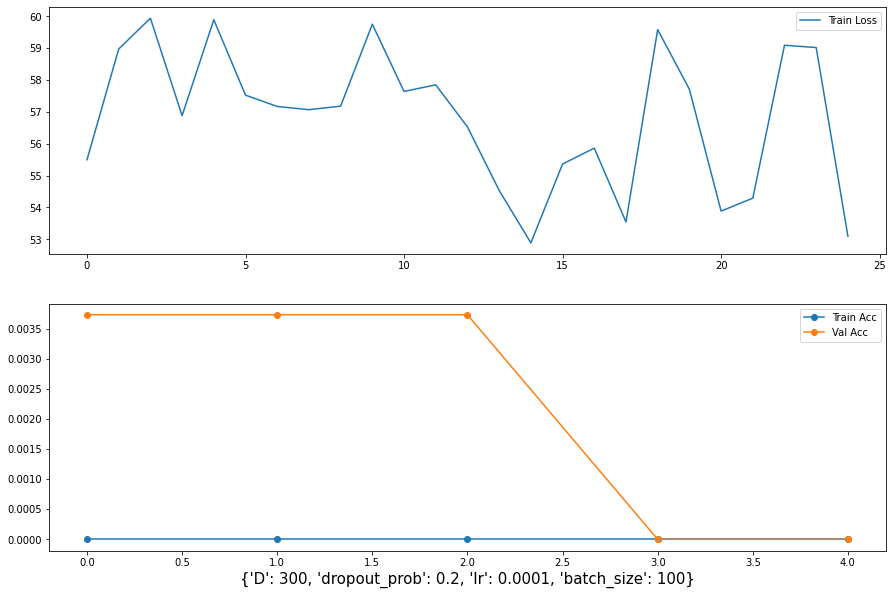

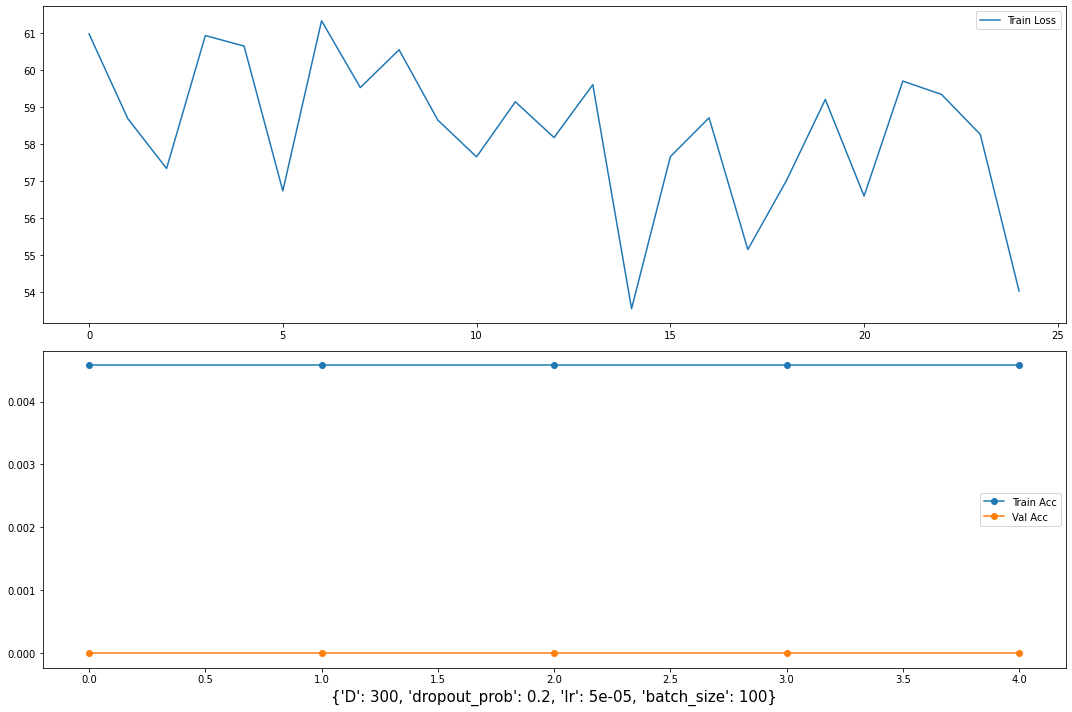

In [9]:
for r in results:
    fig, axs = plt.subplots(nrows=2, figsize=(15, 10))
    losses, train_acc, val_acc = r['stats']
    axs[0].plot(losses, '-', label='Train Loss');
    axs[0].legend()
    axs[1].plot(train_acc, '-o', label='Train Acc');
    axs[1].plot(val_acc, '-o', label='Val Acc');
    axs[1].legend()
    axs[1].set_xlabel(str(r['conf_dict']), fontsize=15)
plt.tight_layout()